<a href="https://colab.research.google.com/github/Bastian951/ClusteringPython/blob/master/Clustering_Jerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Clustering Jerárquico**

Los metodos jerarquicos producen una serie de particiones donde en cada paso o dos grupos se fusionan (agrupamiento jerárquico aglomerativo) o un grupo se divide en dos grupos (agrupamiento jerárquico divisivo) de acuerdo con un criterio dado 

Los metodos jerarquicos se denominan clusters rigidos.



# **Clustering Jerárquico Aglomerativo**

El clustering jerárquico aglomerativo consiste en una serie de métodos que en cada paso unen los dos clusters mas similares. Dada una matriz de distancias $D_n$ la cual contiene distancias de $n$ clusters (inicialmente singletons) se deben seguir los siguientes pasos:

1. De acuerdo a $D_n$ unimos dos unidades (clusters singleton) con la minima distancia en un nuevo cluster. Esto lleva a una partición con $n-1$ clusters.

2. Computar la nueva matriz de distancia $D_{n-1}$ de tamaño $(n-1) \times (n-1)$. Las distancias entre clusters singleton, se heredan desde la matriz original. Hay diversas alternativas para calcular la distancia entre los nuevos clusters y los restantes. (La elección distingue los métodos aglomerativos)

3. Unir 2 clusters con minima distancia usando la matriz de $D_{n-1}$. Dejando una partición de $n-2$ clusters. 

4. Repetir 2 y 3 hasta llegar a $n=2$ y obtener una partición trivial. 

El punto crucial en el el método aglomerativo consiste en la distancia entre la fusión de 2 clusters y otros. Por ejemplo la distancia entre la fusión de $C_1$ y $C_2$ que denotaremos $C_{1,2}$ con el cluster $C_3$. Estos metodos está definidos por la formula **Lance-Williams**

$$d(C_{1,2},C_3) = \alpha_1 d(C_1,C_3)+\alpha_2 d(C_2,C_3) + \beta d(C_1,C_2)+\gamma \vert d(C_1,C_3)-d(C_2,C_3)\vert$$

dependiendo de los valores $\alpha_1, \alpha_2, \beta, \gamma$ se define la clase de método aglomerativo. 

## **Métodos**

### **Single Linkage**

Consiste en la elección $\alpha_1 = \alpha_2 = 0.5$, $\beta=0$ y $\gamma = -0.5$. Obteniendo 

$$d(C_{1},C_2) =\min_{c_1 \in C_1, c_2 \in C_2} d(c_1,c_2)$$

### **Complete Linkage**

Consiste en la elección $\alpha_1 = \alpha_2 = \gamma = 0.5$, $\beta=0$ 

$$d(C_{1},C_2) =\max_{c_1 \in C_1, c_2 \in C_2} d(c_1,c_2)$$


### **Average Linkage**

Consiste en la elección $\alpha_1 = \frac{\vert C_1\vert}{\vert C_1\vert + \vert C_2\vert}$, $\alpha_1 = \frac{\vert C_2\vert}{\vert C_1\vert + \vert C_2\vert}$, $\beta=0$ 

Obteniendo 

$$d(C_{1},C_2) =\frac{\sum_{c_1\in C_1}\sum_{c_2\in C_2} d(c_1,c_2)}{\vert C_1 \vert \vert C_2\vert}$$

### **Método Ward's**

Consiste en la elección $\alpha_1 = \frac{\vert C_1\vert+\vert C_3\vert}{\vert C_1\vert + \vert C_2\vert+\vert C_3\vert}$, $\alpha_2 = \frac{\vert C_2\vert+\vert C_3\vert}{\vert C_1\vert + \vert C_2\vert+\vert C_3\vert}$, $\beta=\frac{-\vert C_3\vert}{\vert C_1\vert + \vert C_2\vert+\vert C_3\vert}$ 

Obteniendo 

$$d(C_{1},C_2) = d(\bar{x}_{C_1},\bar{x}_{C_2})$$
donde $\bar{x}_{C_i} = \bar{C_i}$ con $i=1,2$

En el siguiente link podemos encontrar un ejemplo numérico 

https://people.revoledu.com/kardi/tutorial/Clustering/Numerical%20Example.htm

## **Paquetes en Python**

- `AgglomerativeClustering` en `sklearn.cluster`

## AglomerativeClustering

### **Parámetros:** 

- **n_cluster:** número de clusters
- **affinity:** distancia utilizara para el linkage. Puede ser `euclidean`, `l1`, `l2`, `manhattan`, `cosine`, o `precomputed`. Si el linkage es `ward`, solo se puede utilizar “euclidean”. Si la distancia es “precomputed”, se necesario como input una matriz de disimilaridad para el fit
- **linkage:** Puede ser `ward`, `complete`, `average`, `single`. Por defecto se elige `ward`

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=0)

sc = StandardScaler()
# Los datos son reescalado con respecto a los datos de entrenamiento
sc.fit(X_train) 
# Tanto el conjunto de entrenamiento como el de test son reescalados
Z_train = sc.transform(X_train)
Z_test = sc.transform(X_test)

In [ ]:
clustering = AgglomerativeClustering().fit(Z_train)

In [ ]:
y_pred = clustering.fit_predict(Z_test)

In [ ]:
print("accuracy train",round(accuracy_score(y_train, clustering.fit_predict(Z_train)),3))
print("accuracy test",round(accuracy_score(y_test, y_pred),3))

accuracy train 0.921
accuracy test 0.86


In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 61,  22],
       [ 10, 135]])

## **Plotear dendrograma**

Para plotear utilizamos `dendrogram` de scipy. 

Con el siguiente codigo podemos plotear el modelo obtenido por sklearn. 

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html


In [ ]:
from scipy.cluster.hierarchy import dendrogram

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

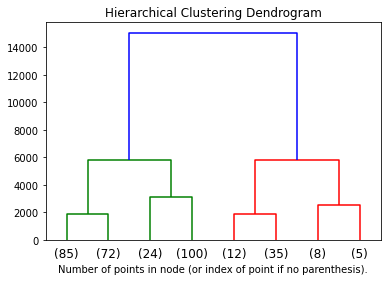

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X_train)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=2)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

`scipy` tiene un paquete llamado `hierarchy` el cual contiene varias herramientas para clustering jerarquico. 

In [ ]:
import scipy.cluster.hierarchy as shc

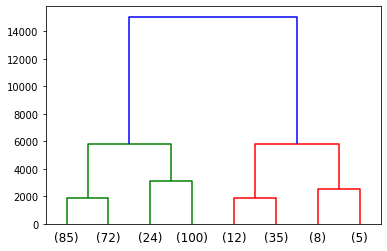

In [ ]:
Z = shc.linkage(X_train, 'ward')
dn = dendrogram(Z, p=2,truncate_mode="level")

Aquí podemos ver todas las funciones del paquete

https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy

#**Clustering Jerárquico Divisivo**

Estos métodos casi no se utilizan en la vida real. Tanto sklearn como scipy no tienen implementado ningun algoritmo divisivo. 

En el siguiente link podemos ver una implementación del algoritmo DIANA en Python

https://github.com/Saikat2019/DIANA-Clustering-Algorithm

**Observación:** DIANA y MONA están implementados en R. Podemos verlos en el apunte de clustering en R (https://bastian951.github.io/ClusteringR/diana.html)

# **Scatter plot**

Para graficar los puntos y colorear por cluster podemos utilizar PCA y plotear las dos primeras componentes principales. 


In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2)
df_fit = pca.fit(X_train)
pca_train = df_fit.transform(X_train)
pca_train = pd.DataFrame(pca_train)
pca_train.columns = ['P1', 'P2']

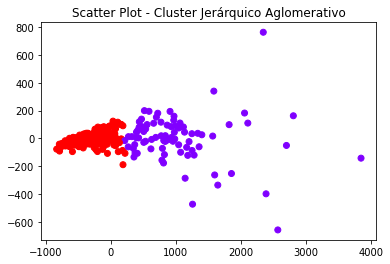

In [ ]:
agc = AgglomerativeClustering(n_clusters = 2)
plt.scatter(pca_train['P1'], pca_train['P2'], c = agc.fit_predict(pca_train), cmap ='rainbow')
plt.title("Scatter Plot - Cluster Jerárquico Aglomerativo")
plt.show() 

otra opción, sería calcular el PCA, considerar todas las componentes principales y aplicar TSNE para reducir la dimensionalidad a 2

**Observación:** K-means es un algoritmo no jerarquico, sin embargo existe una versión jerarquica divisiva llamada `bisecting k-means`.

*Vease el paper original*

http://www.philippe-fournier-viger.com/spmf/bisectingkmeans.pdf

*Vease posible adición a Sklearn*

https://github.com/scikit-learn/scikit-learn/pull/20031